<a href="https://colab.research.google.com/github/pvhau169/MLTSA22_HPhan/blob/main/HW5/HP_Hw5_Revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="red"> FBB much better on the captions, you did make considerations about your modeling work. However, nowhere in the code I see you trying to extract the name of the country from the cluster which was something I asked for and needed to make consideration or even guesses about why the time behavior is what it is. You brought up socioeconomic and sociopolitical reasons for the shapes you see but you did not even look at the countries in the cluster so not clear how you were able to speculate that war, for example, migbt be a driver of pop growhth peculiarities. </font>

In [ ]:
!wget http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=excel

--2022-03-13 17:47:38--  http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=excel
Resolving api.worldbank.org (api.worldbank.org)... 52.188.136.184
Connecting to api.worldbank.org (api.worldbank.org)|52.188.136.184|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 195584 (191K) [application/vnd.ms-excel]
Saving to: ‘SP.POP.TOTL?downloadformat=excel’

SP.POP.TOTL?downloa 100%[===================>] 191.00K   328KB/s    in 0.6s    

2022-03-13 17:47:39 (328 KB/s) - ‘SP.POP.TOTL?downloadformat=excel’ saved [195584/195584]



In [ ]:
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt

In [ ]:
!ls

 sample_data  'SP.POP.TOTL?downloadformat=excel'


In [ ]:
!pip install xlrd==1.2.0

     |████████████████████████████████| 103 kB 5.1 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
pop_data = pd.read_excel("SP.POP.TOTL?downloadformat=excel", skiprows = 3, header = 0, usecols =[0] + list(range(4, 100))).set_index("Country Name")

/usr/local/lib/python3.7/dist-packages/pandas/io/excel/_base.py:1292: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  **kwds,


In [ ]:
pop_data.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,57702.0,58044.0,58377.0,58734.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
Africa Eastern and Southern,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,152752671.0,156876454.0,161156430.0,165611760.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
Afghanistan,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,10399936.0,10637064.0,10893772.0,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
Africa Western and Central,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,109701811.0,112195950.0,114781116.0,117468741.0,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
Angola,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,5781305.0,5774440.0,5771973.0,5803677.0,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0


In [ ]:
pop_data.shape

(266, 61)

In [ ]:
clean_data = pop_data.dropna(axis = 1, how = 'all').dropna(axis = 0, how = 'any')
clean_data.shape

(262, 61)

Text(0, 0.5, 'pop')

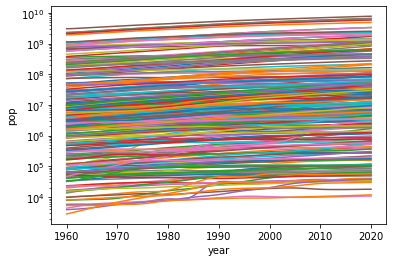

In [ ]:
clean_data.T.plot(legend= False, logy=True)
pl.xlabel('year')
pl.ylabel('pop')

The population of 262 countries in 61 years from 1960 - 2020

In [ ]:
from sklearn import preprocessing 

In [ ]:
# Standardize data set
X = preprocessing.scale(clean_data, axis = 1)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "


In [ ]:
from sklearn import cluster

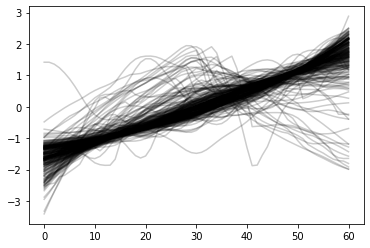

In [ ]:
pl.plot(X.T, "k", alpha = 0.2);

The standardized population of 262 countries in 61 years from 1960 - 2020

<font color="red"> FBB as usual, the caption should describe what is plotted and what you noticed in the plot. This plot does not even have axis lables tho. </font>

In [ ]:
n_cluster = 4
c = cluster.k_means(X, 4)

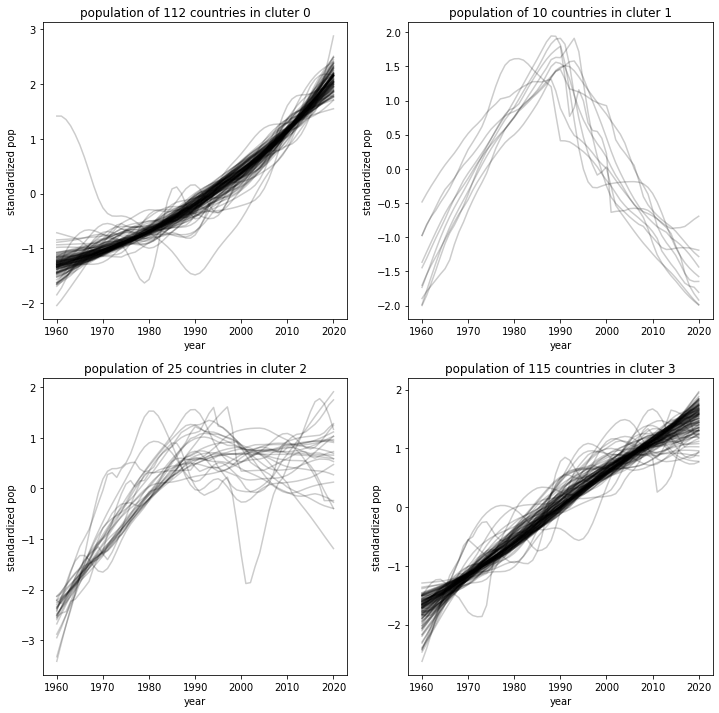

In [ ]:
import matplotlib.ticker as ticker
fig =  plt.figure(figsize = (12, 12))

axes = []
for i_cluster in range(n_cluster):
  axes.append(fig.add_subplot(2, 2, i_cluster+1))
  axes[-1].plot(X[c[1] == i_cluster].T, 'k', alpha = 0.2);
  axes[-1].set_xlabel('year')
  axes[-1].set_title("population of {} countries in cluter {}".format((c[1] == i_cluster).sum(), i_cluster))
  axes[-1].set_ylabel('standardized pop')

  ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x+1960))
  axes[-1].xaxis.set_major_formatter(ticks_x)
plt.show()

Standardized popuilation of countries separating into clusters. The cluster 1 and 2 has smallest number of countries. Based on the graph, the cluster 0 seems like group of developing countries which population growth rate is high nowadays. On another hand, the cluster 3 is group of developed contries which population growth rate seems constant. Countries in group 2 has variated population. I assume they 're still in war? I'm interested in cluster 1. Theres's an event in 1990 that make population of all these countries decrease.

<font color="red"> FBB a lot of considerations about the sociohistorical environment: war, "developed countries"... but you did not even indicate that you looked at _what_ those countries are - how can you say that??</font>

In [ ]:
# country in cluster 1
countries[c[1] == 1]

Index(['Bulgaria', 'Bosnia and Herzegovina', 'Estonia', 'Georgia', 'Croatia',
       'Hungary', 'Lithuania', 'Latvia', 'Romania', 'Ukraine'],
      dtype='object', name='Country Name')

That event may be the colappse of Soviet Union, that lead to the population of nearby countries like Estonia, Latvia, Ukrainve decrease

In [ ]:
# countries in cluster 2
countries[c[1] == 2]

Index(['Albania', 'Armenia', 'Belarus', 'Central Europe and the Baltics',
       'Curacao', 'Czech Republic', 'Dominica', 'Faroe Islands', 'Greenland',
       'Guyana', 'Japan', 'Kazakhstan', 'Moldova', 'North Macedonia',
       'Montenegro', 'Poland', 'Puerto Rico', 'Russian Federation', 'Serbia',
       'Slovak Republic', 'Slovenia', 'Tonga',
       'St. Vincent and the Grenadines', 'Virgin Islands (U.S.)', 'Kosovo'],
      dtype='object', name='Country Name')

Since we have Belarus and Servia here, I assume these countries are also aftected by the collapse of Soviet Union but not crucial as the countries in cluster 1

In [ ]:
from scipy.spatial.distance import cdist
intracluster_variance = []
for n_cluster in range(2, 11):
  # clustering X data for each n_cluster
  c = cluster.k_means(X, n_cluster)
  centers = c[0]
  labels = c[1]
  # i just want to avoid for loop here
  # centers[labels] is the centroid of the cluster that X[i] belong to
  intracluster_variance.append(np.sum(((X - centers[labels]) ** 2)))

Text(0, 0.5, ' intracluster variance')

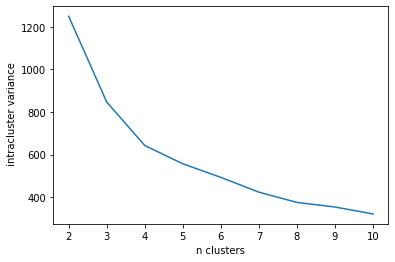

In [ ]:
plt.plot(range(2, 2+len(intracluster_variance)), intracluster_variance)
plt.xlabel("n clusters")
plt.ylabel(" intracluster variance")

The intracluster variance is used to showed how good the data is separated. The plot shows how increaseing the number of cluster contribute separating the clusters in a meaning ful way. From my point of view, the bend of graph after 4 has litte value, so I would choose 4 as the right number of cluster for k-means. As what I understand the Elbow plot method is kind of naive solution since it is subjective. 

<font color="red"> FBB the point here is that **there is no elbow** the graient here is pretty clearly constant</font>

# Extra credits

# Hierarchical Clustering, n_cluster =4

In [ ]:
n_cluster = 4
HierClustering = cluster.AgglomerativeClustering(n_clusters = 4, compute_distances=True).fit(X)

In [ ]:
X.shape

(262, 61)

In [ ]:
labels = HierClustering.labels_
distances = HierClustering.distances_

Result of Hierarchial Clustering

# Dandrogram of Hierarchial Cluster history

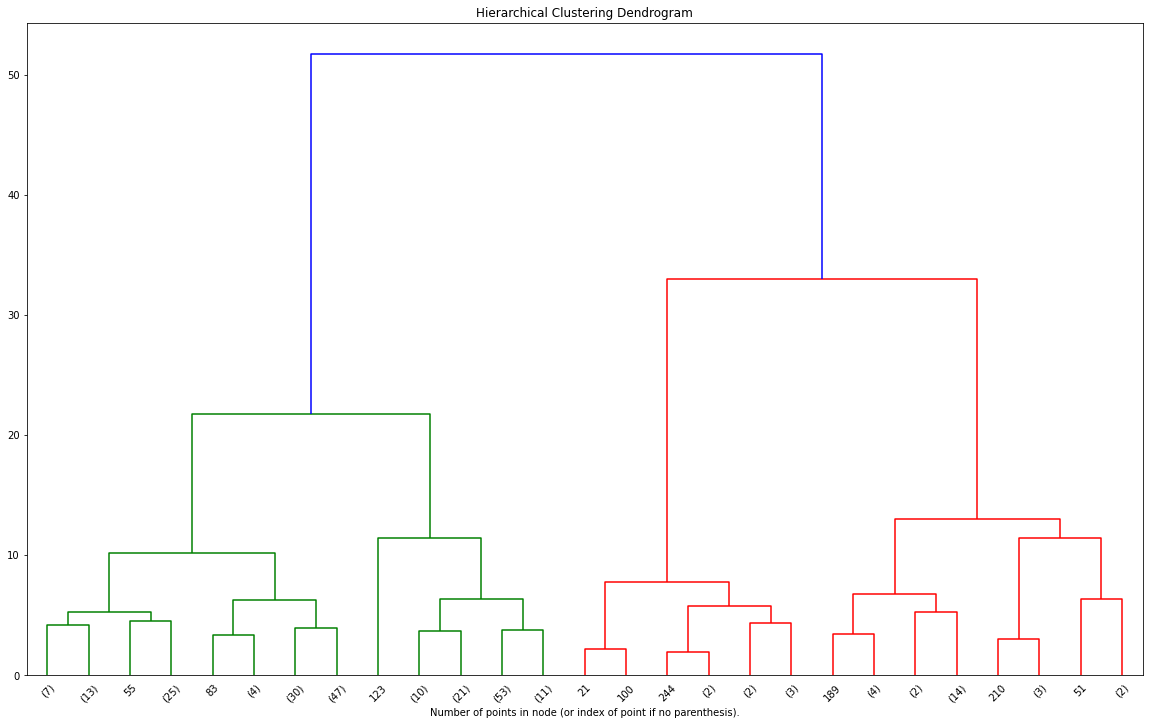

In [ ]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

fig = plt.figure(figsize= (20, 12))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(HierClustering, truncate_mode="level", p = 4)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

I tried but still could not firgure out how to chagne the color of dendrogram to specify the 4 cluster. However, we can see 4 main groups (2 in green on the left, and 2 in red on the right). Also, it would be too crowded if I showed all the countries'names. In stead I just show the number of element in smaller group, as shown above.

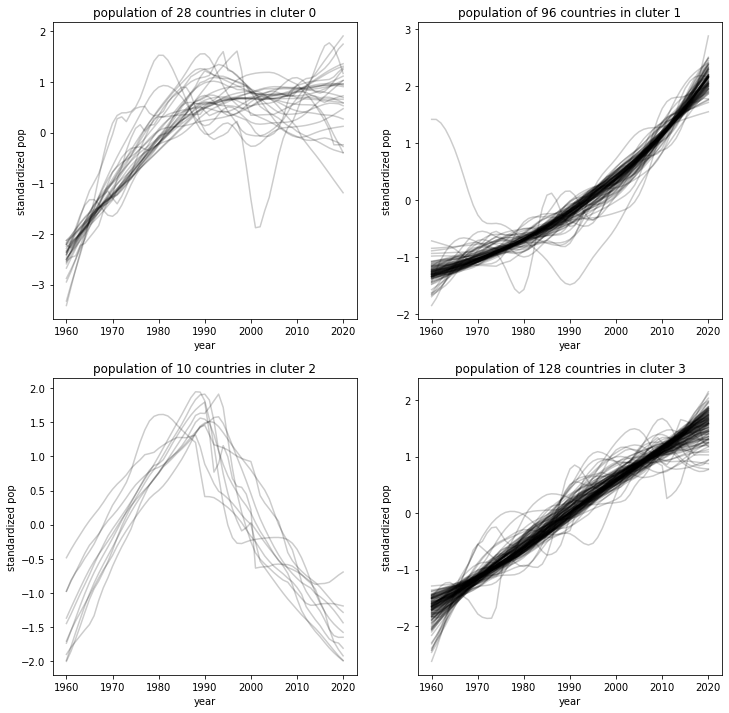

In [ ]:
import matplotlib.ticker as ticker
fig =  plt.figure(figsize = (12, 12))

axes = []
for i_cluster in range(n_cluster):
  axes.append(fig.add_subplot(2, 2, i_cluster+1))
  axes[-1].plot(X[labels == i_cluster].T, 'k', alpha = 0.2);
  axes[-1].set_xlabel('year')
  axes[-1].set_title("population of {} countries in cluter {}".format((labels == i_cluster).sum(), i_cluster))
  axes[-1].set_ylabel('standardized pop')

  ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x+1960))
  axes[-1].xaxis.set_major_formatter(ticks_x)
plt.show()

The plot of Hierarchical Clustering looks pretty much like K-mean clustering result, especially in the group of country that affected by the collapse of Soviet Union ( cluster 2 in this plot, and clust 1 in the plot above)

<font color="red"> FBB I know I said that in class, but did you actually try to figure out how to pukl the country name from the code? I did not see that anywhere in your code</font>

Since there's difference in the number of element in each clusters. I want to compare K-mean Clustering and Hierarchical Clustering, which will produce better centroid (lower intracluster variance). Therefore, I will calculate intracluster variance so see for the same number of clusters, which method can minimize the intracluster variance better

# Comparing Kmean Clustering vs Hierarchical Clustering

In [ ]:
from sklearn.neighbors import NearestCentroid

In [ ]:
# Calculate intracluster variance with Hierarchial Clustering
from sklearn.neighbors import NearestCentroid
hier_intracluster_variance = []
for n_cluster in range(2, 11):
  # clustering X data for each n_cluster
  Hier_c = cluster.AgglomerativeClustering(n_clusters = n_cluster, compute_distances=True).fit(X)
  labels = Hier_c.labels_

  #calculate centroids of each clusters
  clf = NearestCentroid()
  centers = clf.fit(X, labels).centroids_
  # i just want to avoid for loop here
  # centers[labels] is the centroid of the cluster that X[i] belong to
  hier_intracluster_variance.append(np.sum(((X - centers[labels]) ** 2)))


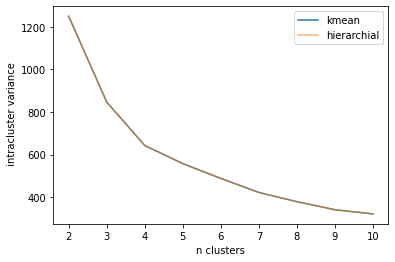

In [ ]:
plt.plot(range(2, 2+len(intracluster_variance)), intracluster_variance, label='kmean')
plt.plot(range(2, 2+len(hier_intracluster_variance)), intracluster_variance, label='hierarchial', alpha = 0.6)
plt.xlabel("n clusters")
plt.ylabel(" intracluster variance")
plt.legend()

Kmean clustering and Hierarchial clustering have same performance on this dataset ...

<font color="red"> FBB ok</font>

In [ ]:
print("intracluster variance of hierarchial clustering")
print(hier_intracluster_variance)
print("intracluster variance of K-mean Clustering")
print(intracluster_variance)

intracluster variance of hierarchial clustering
[1428.8558584390344, 884.3254653722202, 648.0352025750699, 563.495867681894, 497.9727023922786, 432.7248199019163, 381.26551231076155, 350.90104389238695, 328.26275969609355]
intracluster variance of K-mean Clustering
[1249.5287124898719, 846.6025516961851, 642.2296550573027, 557.2082472007182, 487.60790447887206, 421.6686981706451, 378.4949917321072, 340.54066301252846, 320.93091343246294]


# Silhouette analysis on KMeans clustering

Silhoutette score is used to evaluate the distance between the neighbor clusters. The higher score is the better cluterings is. The score close to 1 indicates that the evaluteing cluster is far away from other clusters. The score close to -1 indicates that there's an overlap between clusters.

In [ ]:
# Using Silhouette instead of elbow method to determind the best number of clusters

In [ ]:
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
silhouette_score_avg = []
for n_cluster in range(2, 11):
  # clustering X data for each n_cluster
  c = cluster.k_means(X, n_cluster)
  centers = c[0]
  labels = c[1]
  silhouette_score_avg.append(silhouette_score(X, labels))
  

In [ ]:
from sklearn.metrics import silhouette_score
c = cluster.k_means(X, 3)
silhouette_avg = silhouette_score(X, c[1])

Text(0, 0.5, ' avg silhouette score of k-mean clustering')

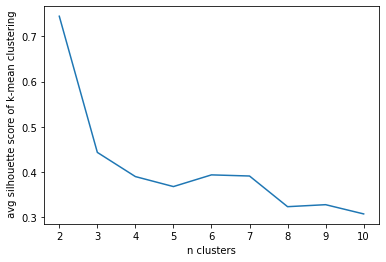

In [ ]:
plt.plot(range(2, 2+len(silhouette_score_avg)), silhouette_score_avg, label='kmean')
plt.xlabel("n clusters")
plt.ylabel(" avg silhouette score of k-mean clustering")

Based on the principle of parsimony, the best number of clusters for this dataset should be 7

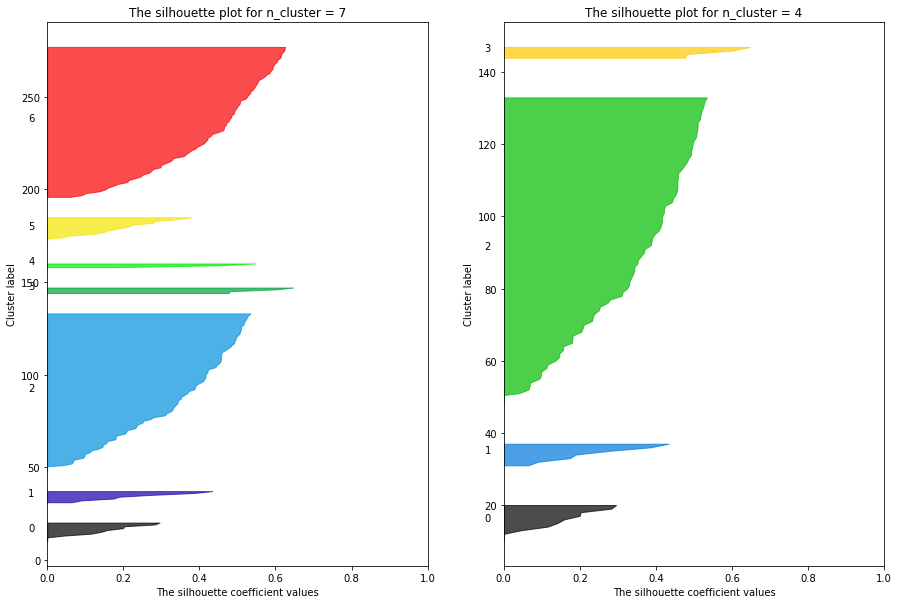

In [ ]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
sample_silhouette_values = silhouette_samples(X, labels)

n_cluster = 7
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

def silhouettePlot(ax1, n_cluster):
  y_lower = 10
  for i in range(n_cluster):
      # Aggregate the silhouette scores for samples belonging to
      # cluster i, and sort them
      ith_cluster_silhouette_values = sample_silhouette_values[labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i) / n_cluster)
      ax1.fill_betweenx(
          np.arange(y_lower, y_upper),
          0,
          ith_cluster_silhouette_values,
          facecolor=color,
          edgecolor=color,
          alpha=0.7,
      )

      # Label the silhouette plots with their cluster numbers at the middle
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      # Compute the new y_lower for next plot
      y_lower = y_upper + 10  # 10 for the 0 samples

  ax1.set_xlim(0, 1)

  ax1.set_title("The silhouette plot for n_cluster = {}".format(n_cluster))
  ax1.set_xlabel("The silhouette coefficient values")
  ax1.set_ylabel("Cluster label")


silhouettePlot(ax1, 7)
silhouettePlot(ax2, 4)

With n_cluster =7, The silhouette score for each cluster label is still high enough to make a high average silhouette score.